<h1> <center> Naive Bayes Classifier </center></h1>

<center><img src="naive_bayes.png" alt="Drawing" style="width: 300px"></center>

In [17]:
# Importing libraries

import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
# Efficient Supervises Algorithm and can be used with small training data
# Considers "every pair of feature are independent to each other"
# Performs well in high dimension data

In [18]:
# Roots of this classifier are in "Conditional Probablity"

In [56]:
# P(A|B) ==> Posterior Probablity
# P(B|A) ==> Likelihood
# P(A) ==> Class Prior Probablity
# P(B) ==> Predictor Prior Probablity

# P(A|B) = P(B|A) * P(A) / P(B)

# Probablity for each individual feature and target variable is multipied to get the overall probablity

# Let's say we have A,B, and C Varible and T is the target variable

# P(A | T) = P(T)*P(A|T) / P(A)
# P(B | T) = P(T)*P(B|T) / P(B)

# T = P(A|T) * P(B|T) ==> Probablity of getting the target

# Three types of Naive Bayes Classifier 

# Bernoulli
# Gaussian
# Multinominal


In [8]:
credit_card = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')

In [11]:
credit_card.drop('Time', axis=1, inplace=True)

In [12]:
credit_card.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [91]:
credit_card = credit_card.replace([np.inf, -np.inf], np.nan)

credit_card.dropna(inplace=True)

In [92]:
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [93]:
X = X.replace([np.inf,-np.inf], np.nan)

X.dropna(inplace=True)

In [94]:
X_train,X_t, y_train, y_t = train_test_split(X,y,stratify=y,test_size=0.4)
X_test, X_valid, y_test, y_valid = train_test_split(X_t,y_t,stratify=y_t,test_size=0.3)

In [95]:
print(X_train.shape, X_test.shape, X_valid.shape)

(170884, 29) (79746, 29) (34177, 29)


In [96]:
print(y_train.shape, y_test.shape, y_valid.shape)

(170884,) (79746,) (34177,)


In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit(X_test)

In [98]:
from scipy.stats import normaltest

In [99]:
# To check if the features are normal or gaussian

for t in X_train.columns:
    stat, p = normaltest(X_train[t])
    alpha = 0.5
    if p > alpha:
        print("Column Name : ", t, "looks Gaussian")
    else:
        print("Column Name: ", t, "Not Normal")

stats = list(zip(column_name,p_values))

Column Name:  V1 Not Normal
Column Name:  V2 Not Normal
Column Name:  V3 Not Normal
Column Name:  V4 Not Normal
Column Name:  V5 Not Normal
Column Name:  V6 Not Normal
Column Name:  V7 Not Normal
Column Name:  V8 Not Normal
Column Name:  V9 Not Normal
Column Name:  V10 Not Normal
Column Name:  V11 Not Normal
Column Name:  V12 Not Normal
Column Name:  V13 Not Normal
Column Name:  V14 Not Normal
Column Name:  V15 Not Normal
Column Name:  V16 Not Normal
Column Name:  V17 Not Normal
Column Name:  V18 Not Normal
Column Name:  V19 Not Normal
Column Name:  V20 Not Normal
Column Name:  V21 Not Normal
Column Name:  V22 Not Normal
Column Name:  V23 Not Normal
Column Name:  V24 Not Normal
Column Name:  V25 Not Normal
Column Name:  V26 Not Normal
Column Name:  V27 Not Normal
Column Name:  V28 Not Normal
Column Name:  Amount Not Normal


In [100]:
from sklearn.naive_bayes import GaussianNB

In [146]:
model = GaussianNB()

In [147]:
fitted_model = model.fit(X_train,y_train)

In [148]:
predictions = fitted_model.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score

In [108]:
print(accuracy_score(y_test,predictions))

0.977967546961603


In [109]:
print(recall_score(y_test,predictions))

0.8260869565217391


In [110]:
print(f1_score(y_test,predictions))

0.11486146095717883


In [111]:
print(confusion_matrix(y_test,predictions))

[[77875  1733]
 [   24   114]]


<h2><center> ROC Curve </center></h2>

In [161]:
# ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [131]:
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predicted_0','Predicted_1'],index=['True_0','True_1'])

,Predicted_0,Predicted_1
True_0,77875,1733
True_1,24,114


In [132]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

In [185]:
print(tn ," : Were actually negative and were predicted negative")
print(tp , ": Were actually positive and were predicted positive")
print(fp, ": Were actually negative but were predicted positive")
print(fn, ": Were actually positive but were predicted negative")

77875  : Were actually negative and were predicted negative
114 : Were actually positive and were predicted positive
1733 : Were actually negative but were predicted positive
24 : Were actually positive but were predicted negative


In [143]:
# Now lets look at the same for many thresholds

In [153]:
# only for positive class
prediction_estimate = fitted_model.predict_proba(y_test.values.reshape(-1,1))[:,1]

In [160]:
noskill_prob = [0 for _ in range(len(y_test))]

In [162]:
noskill_auc = roc_auc_score(y_test,noskill_prob)

In [165]:
nbc_auc = roc_auc_score(y_test,prediction_estimate)

In [167]:
ns_fpr, ns_tpr, _ = roc_curve(y_test,noskill_prob)

In [170]:
nbc_fpr, nbc_tpr, _ = roc_curve(y_test,prediction_estimate)

In [173]:
from matplotlib import pyplot

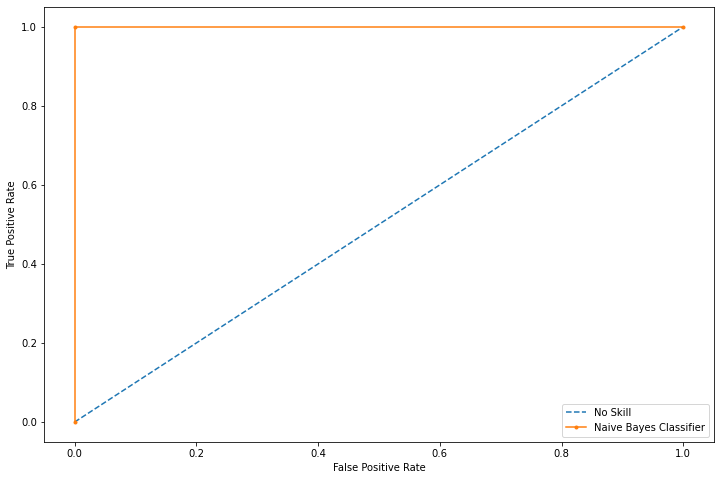

In [187]:
pyplot.figure(figsize=(12,8))
pyplot.plot(ns_fpr,ns_tpr, linestyle='--', label="No Skill")
pyplot.plot(nbc_fpr,nbc_tpr,marker=".", label="Naive Bayes Classifier")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.show()

<h2><center>Precision Recall Curve </center></h2>

In [189]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [193]:
nbc_precision, nbc_recall, _ = precision_recall_curve(y_test,prediction_estimate)

In [198]:
ns_precision, ns_recall, _ = precision_recall_curve(y_test,noskill_prob)

In [201]:
nbc_f1_score = f1_score(y_test,predictions)

In [ ]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

In [215]:
no_skill = len(y_test[y_test.values==1]) / len(y_test)

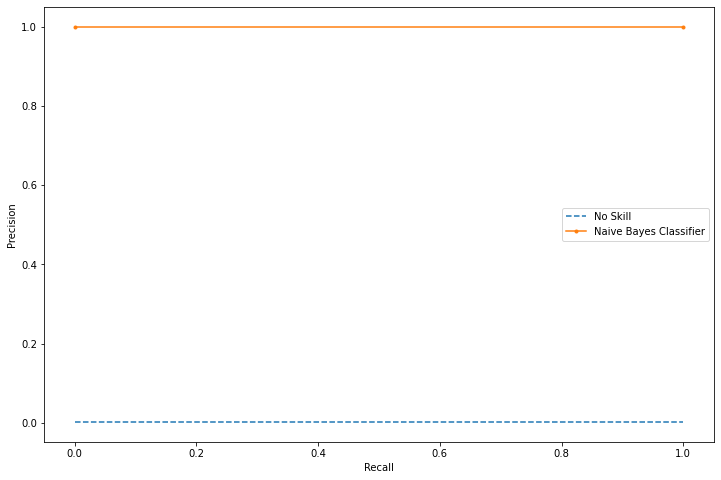

In [224]:
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[no_skill,no_skill],linestyle="--", label='No Skill')
pyplot.plot(nbc_recall,nbc_precision,marker='.', label='Naive Bayes Classifier')
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
pyplot.legend()
pyplot.show()

<h2><center> Calibration Curve </center></h2>

In [235]:
# To identify how good a model is to predict a class
# The calibration curve is best when its closely fitting the 45 degree line

In [225]:
from sklearn.calibration import calibration_curve

In [227]:
prob_true, prob_pred = calibration_curve(y_test,prediction_estimate,n_bins=10,normalize=True)

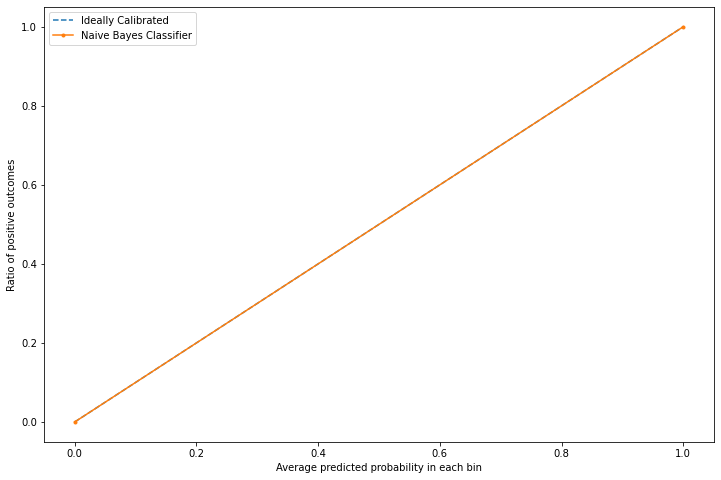

In [241]:
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[0,1], linestyle="--", label="Ideally Calibrated")
pyplot.plot(prob_true,prob_pred, marker=".", label="Naive Bayes Classifier")
pyplot.xlabel("Average predicted probability in each bin")
pyplot.ylabel("Ratio of positive outcomes")
pyplot.legend()
pyplot.show()

<h2><center> Learning Curve </center><h2>

In [242]:
# To identify Bias and Variance

# High Bias ==> Underfitted
# High Variance ==> Overfitted

<a href="https://www.geeksforgeeks.org/using-learning-curves-ml/">Geeks for Geeks Explanation</a>


<p> <b>Bias</b>: 
It is basically nothing but the difference between the average prediction of a model and the correct value of the prediction. Models with high bias make a lot of assumptions about the training data. This leads to over-simplification of the model and may cause a high error on both the training and testing sets. However, this also makes the model faster to learn and easy to understand. Generally, linear model algorithms like Linear Regression have a high bias.
</p>
<p>
<b>Variance</b>: 
It is the amount a model’s prediction will change if the training data is changed. Ideally, a machine learning model should not vary too much with a change in training sets i.e., the algorithm should be good at picking up important details about the data, regardless of the data itself. Example of algorithms with high variance is Decision Trees, Support Vector Machines (SVM).

Ideally, we would want a model with low variance as well as low bias. To achieve lower bias, we need more training data but with higher training data, the variance of the model will increase. So, we have to strike a balance between the two. This is called the bias-variance 
    
</p>

In [244]:
# The learning curve shows how the error changes as we change the number of training size increases

In [245]:
from sklearn.model_selection import learning_curve

In [247]:
train_size , train_score, test_scores = learning_curve(GaussianNB(),
                                                      X_train,
                                                      y_train,
                                                      cv=10,
                                                      scoring='recall',
                                                      n_jobs=-1,
                                                      train_sizes=np.linspace(0.01,1.0,50))

In [251]:
train_means = np.mean(train_score,axis=1)
test_means = np.mean(test_scores,axis=1)

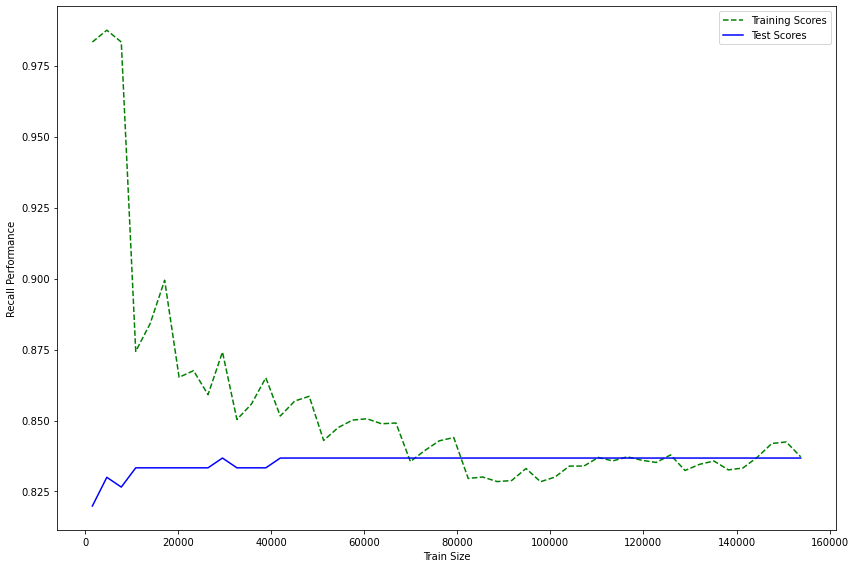

In [279]:
pyplot.figure(figsize=(12,8))
pyplot.plot(train_size,train_means,'--', color="g",  label="Training Scores")
pyplot.plot(train_size,test_means,color="b", label="Test Scores")
pyplot.xlabel("Train Size")
pyplot.ylabel("Recall Performance")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()